In [651]:
#Q1
import pandas as pd 
import numpy as  np
import math
import matplotlib.pyplot as plt

data = pd.read_csv("car_price_dataset.csv",index_col=0)
data.head()

,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
1,alfa-romero giulia,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,13495.0
2,alfa-romero stelvio,gas,168.8,64.1,48.8,2548,four,130.0,111.0,21,27,16500.0
3,alfa-romero Quadrifoglio,gas,171.2,65.5,52.4,2823,six,152.0,154.0,19,26,16500.0
4,audi 100 ls,gas,176.6,66.2,54.3,2337,four,109.0,NaN,24,30,13950.0
5,audi 100ls,gas,176.6,66.4,54.3,2824,five,136.0,115.0,18,22,NaN


Head : پنج داده ی اول در آرایه

In [652]:
#Q1
data.tail()

,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
201,volvo 145e (sw),gas,188.8,68.9,55.5,2952,four,141.0,114.0,23,28,16845.0
202,volvo 144ea,gas,188.8,68.8,55.5,3049,four,141.0,160.0,19,25,19045.0
203,volvo 244dl,gas,188.8,68.9,55.5,3012,six,173.0,134.0,18,23,21485.0
204,volvo 246,diesel,188.8,68.9,55.5,3217,six,145.0,106.0,26,27,22470.0
205,volvo 264gl,gas,188.8,68.9,55.5,3062,four,141.0,114.0,19,25,22625.0


Tail :  پنج داده ی آخر در آرایه

In [653]:
#Q1
data.describe()

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,191.000000,182.000000,205.000000,205.000000,185.000000
mean,174.049268,65.907805,53.724878,2555.565854,125.418848,105.747253,25.219512,30.751220,13392.181984
std,12.337289,2.145204,2.443522,520.680204,39.229587,40.288214,6.542142,6.886443,8235.838288
min,141.100000,60.300000,47.800000,1488.000000,61.000000,52.000000,13.000000,16.000000,5118.000000
25%,166.300000,64.100000,52.000000,2145.000000,97.000000,72.250000,19.000000,25.000000,7788.000000
50%,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,24.000000,30.000000,10295.000000
75%,183.100000,66.900000,55.500000,2935.000000,141.000000,121.000000,30.000000,34.000000,16503.000000
max,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,49.000000,54.000000,45400.000000


Describe : count (تعداد داده های غیر null/NA ) , max ( ماکسیمم داده در آن ستون), min (مینیمم داده در آن ستون), mean (میانگین ) ،  std (انحراف معیار), چارک های اول و دوم و سوم

In [654]:
#Q2
cleanup_nums = {"fueltype":     {"gas": 0, "diesel": 1},
               "cylindernumber":{"one":1, "two":2, "three":3, "four":4, "five":5, "six": 6, 
                                 "seven":7, "eight": 8, "nine":9, "ten":10, "eleven":11, "twelve": 12}}

data = data.replace(cleanup_nums)

data["CarName"] = data["CarName"].astype('category')
data.info()
data["CarName"] = data["CarName"].cat.codes
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CarName         205 non-null    category
 1   fueltype        205 non-null    int64   
 2   carlength       205 non-null    float64 
 3   carwidth        205 non-null    float64 
 4   carheight       205 non-null    float64 
 5   curbweight      205 non-null    int64   
 6   cylindernumber  205 non-null    int64   
 7   enginesize      191 non-null    float64 
 8   horsepower      182 non-null    float64 
 9   citympg         205 non-null    int64   
 10  highwaympg      205 non-null    int64   
 11  price           185 non-null    float64 
dtypes: category(1), float64(6), int64(5)
memory usage: 22.3 KB


,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
1,2,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,13495.0
2,3,0,168.8,64.1,48.8,2548,4,130.0,111.0,21,27,16500.0
3,1,0,171.2,65.5,52.4,2823,6,152.0,154.0,19,26,16500.0
4,4,0,176.6,66.2,54.3,2337,4,109.0,NaN,24,30,13950.0
5,5,0,176.6,66.4,54.3,2824,5,136.0,115.0,18,22,NaN


In [655]:
#Q3
data.isna().sum()

CarName            0
fueltype           0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize        14
horsepower        23
citympg            0
highwaympg         0
price             20
dtype: int64

In [656]:
#Q3
data['enginesize'].fillna(data['enginesize'].mean(),inplace=True)
data["horsepower"].fillna(data["horsepower"].mean(),inplace=True)

In [657]:
#Q3
isNan = np.isnan(data.price)
Nan_prices = data[isNan]
data.dropna(subset=['price'],inplace=True)
Nan_prices


,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
5,5,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,NaN
30,31,0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,NaN
32,43,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,NaN
53,61,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,NaN
54,59,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,NaN
60,53,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,NaN
63,59,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,NaN
68,19,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,NaN
79,68,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,NaN


In [658]:
#Q4
print(data["cylindernumber"].value_counts())

4     143
6      22
5       9
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64


In [659]:
#Q5
isGas =  data['fueltype']==0
isGas = data['horsepower'] > 100
isGas = data['citympg'] < 15
SpecialGas = data[isGas]

print(len(SpecialGas.index))
SpecialGas

3


,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
50,50,0,191.7,70.6,47.8,3950,12,326.000000,262.000000,13,17,36000.0
74,18,0,208.1,71.7,56.7,3900,8,125.418848,105.747253,14,16,40960.0
75,21,0,199.2,72.0,55.4,3715,8,304.000000,184.000000,14,16,45400.0


In [660]:
#Q6
def using_vectorization(data):
    Mean_gas_cars = data[data.fueltype.eq(0)].price.mean()
    Mean_diesel_cars = data[data.fueltype.eq(1)].price.mean()

    print("gas mean: ",Mean_gas_cars)
    print("diesel mean: ",Mean_diesel_cars)
    

import time;

t1 = time.time()
using_vectorization(data)
t2 = time.time()
print("time is: ",t2-t1)

gas mean:  13170.738957831325
diesel mean:  15326.894736842105
time is:  0.0020003318786621094


In [661]:
#Q7
def using_loops(data):
    gas_num = 0;
    diesel_num = 0
    gas_cars_prices = 0
    diesel_cars_prices = 0
        
    for i in data.index:
        if data.fueltype[i] == 0:
            gas_num += 1
            gas_cars_prices += (data.price[i])
        else:
            diesel_num += 1
            diesel_cars_prices += (data.price[i])

    print("gas mean: ",gas_cars_prices/gas_num)
    print("diesel mean: ",diesel_cars_prices/diesel_num)
    
t3 = time.time()
using_loops(data)
t4 = time.time()
print("time is: ",t4-t3)

gas mean:  13170.738957831325
diesel mean:  15326.894736842105
time is:  0.0049474239349365234


In [662]:
#Q7
print('Speed difference: {:0.1f}x'.format((t4-t3) / (t2-t1)))

Speed difference: 2.5x


سرعت در زمانی که از حلقه استفاده نمی کنیم، بیشتر از زمانی است که از حلقه استفاده می کنیم

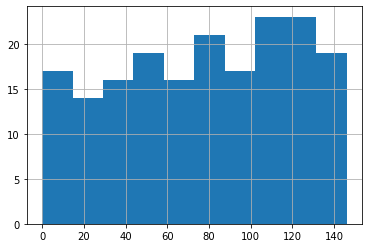

In [663]:
#Q8
hist = data.CarName.hist()

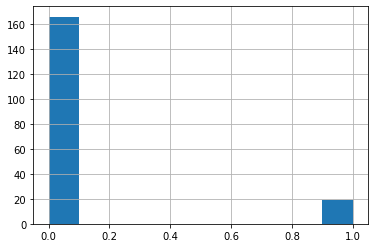

In [664]:
#Q8
hist = data.fueltype.hist()

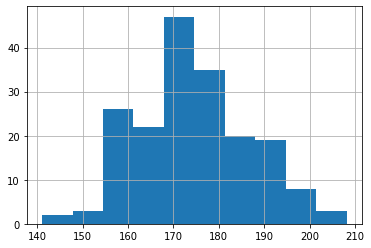

In [665]:
#Q8
hist = data.carlength.hist()

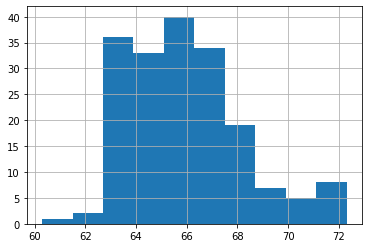

In [666]:
#Q8
hist = data.carwidth.hist()

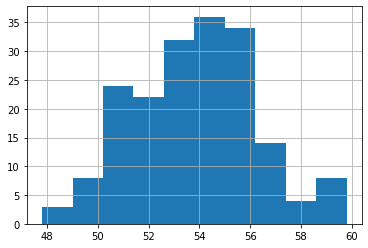

In [667]:
#Q8
hist = data.carheight.hist()

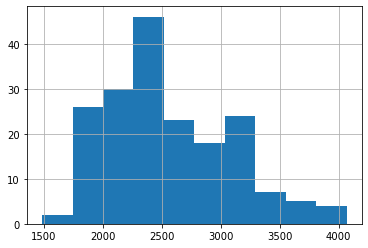

In [668]:
#Q8
hist = data.curbweight.hist()

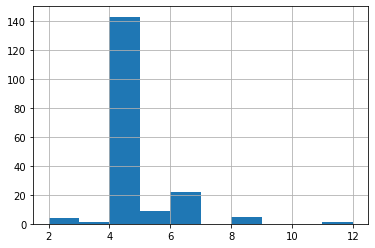

In [669]:
#Q8
hist = data.cylindernumber.hist()

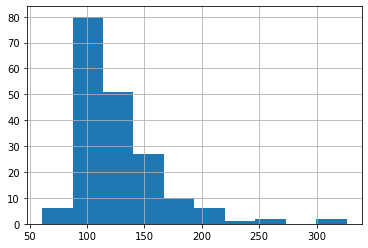

In [670]:
#Q8
hist = data.enginesize.hist()

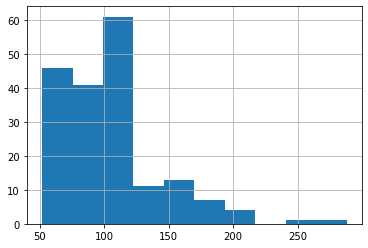

In [671]:
#Q8
hist = data.horsepower.hist()

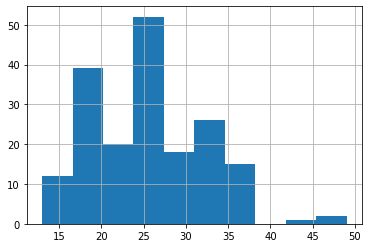

In [672]:
#Q8
hist = data.citympg.hist()

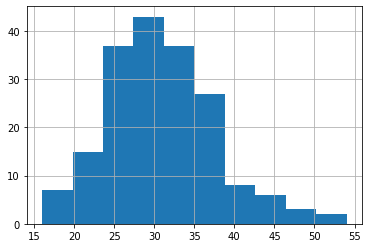

In [673]:
#Q8
hist = data.highwaympg.hist()

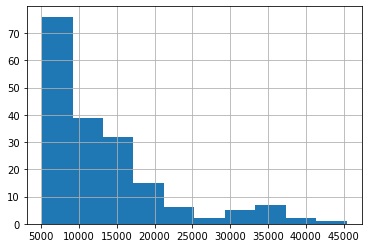

In [674]:
#Q8
hist = data.price.hist()

In [675]:
#Q8
newData = data.drop(labels=['CarName','fueltype'],axis=1)
newData

,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,
1,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,13495.0
2,168.8,64.1,48.8,2548,4,130.0,111.000000,21,27,16500.0
3,171.2,65.5,52.4,2823,6,152.0,154.000000,19,26,16500.0
4,176.6,66.2,54.3,2337,4,109.0,105.747253,24,30,13950.0
6,177.3,66.3,53.1,2507,5,136.0,110.000000,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...
201,188.8,68.9,55.5,2952,4,141.0,114.000000,23,28,16845.0
202,188.8,68.8,55.5,3049,4,141.0,160.000000,19,25,19045.0
203,188.8,68.9,55.5,3012,6,173.0,134.000000,18,23,21485.0


In [676]:
#Q9
newData_mean = newData.price.mean()
newData_std = newData.price.std()
newData.price = ((newData.price - newData_mean)/newData_std)
newData.price

car_ID
1      0.012484
2      0.377353
3      0.377353
4      0.067731
6      0.225577
         ...   
201    0.419243
202    0.686368
203    0.982634
204    1.102234
205    1.121054
Name: price, Length: 185, dtype: float64

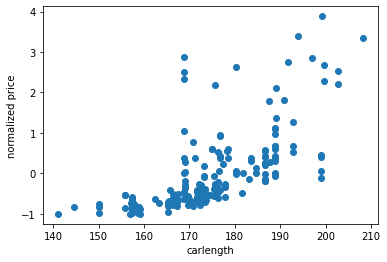

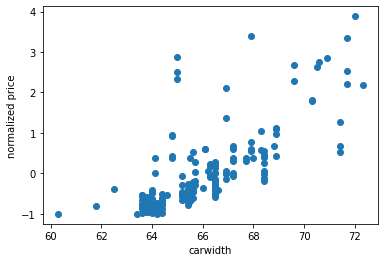

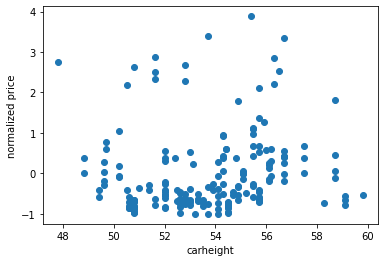

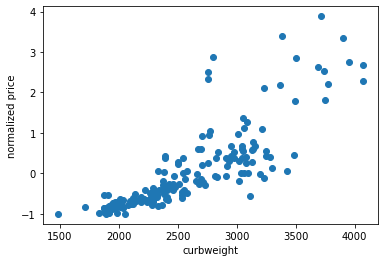

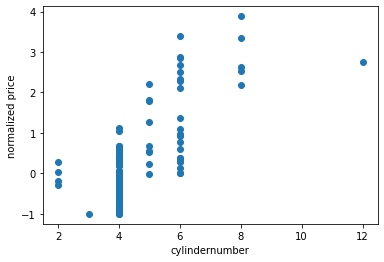

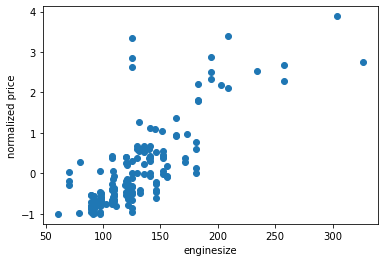

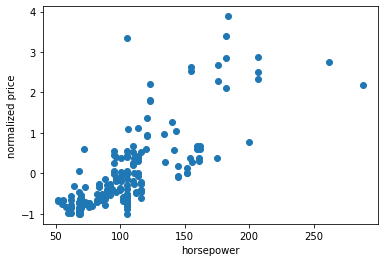

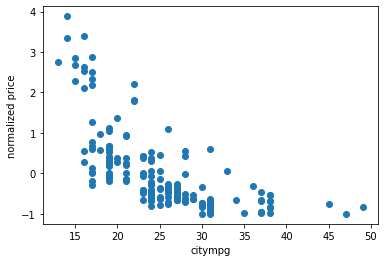

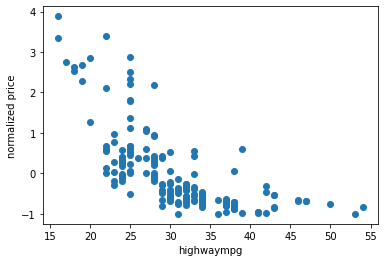

In [677]:
#Q10-A
plt.scatter(newData.carlength, newData.price)
plt.xlabel("carlength")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.carwidth, newData.price)
plt.xlabel("carwidth")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.carheight, newData.price)
plt.xlabel("carheight")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.curbweight, newData.price)
plt.xlabel("curbweight")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.cylindernumber, newData.price)
plt.xlabel("cylindernumber")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.enginesize, newData.price)
plt.xlabel("enginesize")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.horsepower, newData.price)
plt.xlabel("horsepower")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.citympg, newData.price)
plt.xlabel("citympg")
plt.ylabel("normalized price")
plt.show()
plt.scatter(newData.highwaympg, newData.price)
plt.xlabel("highwaympg")
plt.ylabel("normalized price")
plt.show()

In [678]:
#Q11
EnginePrice_df = pd.DataFrame(newData,columns = ['enginesize', 'price'])
EnginePrice_df

,enginesize,price
car_ID,,
1,130.0,0.012484
2,130.0,0.377353
3,152.0,0.377353
4,109.0,0.067731
6,136.0,0.225577
...,...,...
201,141.0,0.419243
202,141.0,0.686368
203,173.0,0.982634


In [679]:
teta_1 = (EnginePrice_df.price.max()-EnginePrice_df.price.min())/(EnginePrice_df.enginesize.max()-EnginePrice_df.enginesize.min())
teta_0 = -teta_1 * EnginePrice_df.enginesize.min() + EnginePrice_df.price.min()
print(teta_1)
print(teta_0)

0.018456839711072422
-2.130522934925918


In [680]:
#Q12
def MSE(df):
    N = len(df)
    ans = ((df.price - (df.enginesize*teta_1 + teta_0))**2).sum()
    print("MSE: ",ans/N)
MSE(EnginePrice_df)

MSE:  0.4080266491200603


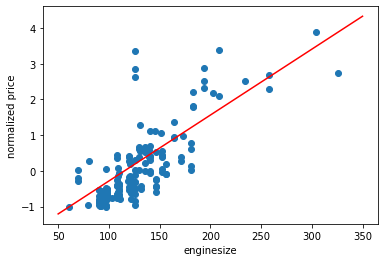

In [681]:
#Q13
def H_teta(x):
    return x*teta_1 + teta_0
x = np.linspace(50,350)
y = H_teta(x)
plt.scatter( EnginePrice_df.enginesize,EnginePrice_df.price)
plt.xlabel("enginesize")
plt.ylabel("normalized price")
plt.plot(x,y,'r')

In [682]:
Nan_prices

,CarName,fueltype,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
5,5,0,176.6,66.4,54.3,2824,5,136.000000,115.0,18,22,NaN
30,31,0,173.2,66.3,50.2,2811,4,156.000000,145.0,19,24,NaN
32,43,0,144.6,63.9,50.8,1819,4,92.000000,76.0,31,38,NaN
53,61,0,159.1,64.2,54.1,1905,4,91.000000,68.0,31,38,NaN
54,59,0,166.8,64.2,54.1,1945,4,91.000000,68.0,31,38,NaN
60,53,0,177.8,66.5,53.7,2385,4,122.000000,84.0,26,32,NaN
63,59,0,177.8,66.5,55.5,2410,4,122.000000,84.0,26,32,NaN
68,19,1,190.9,70.3,56.5,3515,5,183.000000,123.0,22,25,NaN
79,68,0,157.3,64.4,50.8,2004,4,92.000000,68.0,31,38,NaN


In [683]:
#Q14
print('         ', 'price')
final_output = Nan_prices.enginesize * teta_1 + teta_0
final_output = final_output * newData_std + newData_mean
final_output

          price


car_ID
5      16518.566038
30     19558.716981
32      9830.233962
53      9678.226415
54      9678.226415
60     14390.460377
63     14390.460377
68     23662.920755
79      9830.233962
85     19558.716981
88     12566.369811
89     12566.369811
105    23358.905660
124    14390.460377
137    14910.151101
138    14238.452830
142    12262.354717
150    12262.354717
182    20318.754717
190    12414.362264
Name: enginesize, dtype: float64